# Problem Statement

- **An education company named X Education sells online courses to industry professionals. On any given day, many professionals who are interested in the courses land on their website and browse for courses.**<br>
- **The company markets its courses on several websites and search engines like Google. Once these people land on the website, they might browse the courses or fill up a form for the course or watch some videos.**<br> 
- **When these people fill up a form providing their email address or phone number, they are classified to be a lead. Moreover, the company also gets leads through past referrals.**<br>
- **Once these leads are acquired, employees from the sales team start making calls, writing emails, etc. Through this process, some of the leads get converted while most do not. The typical lead conversion rate at X education is around 30%.**

# Expected result of the case study

- **Build a logistic regression model to assign a lead score between 0 and 100 to each of the leads which can be used by the company to target potential leads. A higher score would mean that the lead is hot, i.e. is most likely to convert whereas a lower score would mean that the lead is cold and will mostly not get converted.**

In [1]:
# importing the necessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# supressing warnings

import warnings
warnings.filterwarnings("ignore")

In [3]:
# importing Machine Learing libraries - Statsmodels

import statsmodels.api as sm

from statsmodels.stats.outliers_influence import variance_inflation_factor

In [4]:
# importing Machine Learning Libraries - scikit learn

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn import metrics


In [5]:
lead_df = pd.read_csv("Leads.csv")

In [6]:
pd.set_option("display.max_columns",100)

In [7]:
lead_df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [8]:
lead_df.shape

(9240, 37)

In [9]:
lead_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

- All the columns are in their expected datatypes.
- We have,
    - 30-object datatypes
    - 4-float datatypes
    - 3-integer datatypes

In [10]:
# Checking for duplicated values in the dataframe

lead_df.duplicated().sum()

0

# Data Cleaning

In [11]:
# Checking the null values

lead_df.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   1438
How did you hear about X Education               2207
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

In [12]:
(lead_df.isnull().sum() != 0).sum()

17

**We have missing values in 17 columns**

***

In [13]:
# Checking the missing value percentage

round((lead_df.isnull().sum()/len(lead_df.index))*100, 2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   15.56
How did you hear about X Education               23.89
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper 

**Droping the columns which have missing vlaues more than 45%, AS imputing them will induce a severe bias in the analysis**

In [14]:
for i in lead_df.columns:
    if ((lead_df[i].isnull().sum()/len(lead_df.index)) >= 0.45):
        lead_df.drop(i, axis = 1, inplace = True)

In [15]:
# From 37 columns we are left with 35 columns

lead_df.shape

(9240, 32)

In [16]:
# Checking if any row has missing value more than 50%

missing_rows = (lead_df.isnull().sum(axis = 1)/lead_df.shape[1])
missing_rows[missing_rows > 0.50]

Series([], dtype: float64)

- **There are no rows with missing values more than 50%**

In [17]:
round((lead_df.isnull().sum()/len(lead_df.index))*100, 2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   15.56
How did you hear about X Education               23.89
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper 

In [18]:
'''Droping the variables "Prospect ID" and "Lead Number" as they are unique ID and number given for each customers,
and will have no impact on the analysis.'''

lead_df.drop(["Prospect ID", "Lead Number"], axis = 1, inplace = True)

In [19]:
cat_col = lead_df.select_dtypes(exclude = ["integer", "float"]).columns

In [20]:
for i in cat_col:
    print(lead_df[i].value_counts(dropna = False))
    print("\n")

Landing Page Submission    4886
API                        3580
Lead Add Form               718
Lead Import                  55
Quick Add Form                1
Name: Lead Origin, dtype: int64


Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
NaN                    36
bing                    6
google                  5
Click2call              4
Press_Release           2
Live Chat               2
Social Media            2
welearnblog_Home        1
testone                 1
Pay per Click Ads       1
blog                    1
WeLearn                 1
youtubechannel          1
NC_EDM                  1
Name: Lead Source, dtype: int64


No     8506
Yes     734
Name: Do Not Email, dtype: int64


No     9238
Yes       2
Name: Do Not Call, dtype: int64


Email Opened                    3437
SMS Sent                        2745
Olark Cha

- **From the observation, the columns 1) Specialization, 2) How did you hear about X Education, 3) Lead Profile, 4) City have a category level called "Select" which indicates that these customers are unwilling to mention these criterion asked by the EdTech company.**<br><br>

- **These values are as good as values which are missing not at random, because they have a logical reason for being so.**<br><br>

- **Also we have another category as NaN which is actually the missing values present in the respective columns.**<br><br>

- **And these two categories when combined have the highest mode in their respective columns.<br>So rather than imputing these values with mode, We are changing them to "not mentioned" category, so that we can find whether the customers who are not willing to share their personal information in a survey will finally convert or not.**

In [21]:
lead_df["Specialization"] = lead_df["Specialization"].replace([np.nan, "Select"], "not mentioned")

lead_df["How did you hear about X Education"] = lead_df["How did you hear about X Education"].replace([np.nan, "Select"], "not mentioned")

lead_df["Lead Profile"] = lead_df["Lead Profile"].replace([np.nan, "Select"], "not mentioned")

lead_df["City"] = lead_df["City"].replace([np.nan, "Select"], "not mentioned")

In [22]:
# Cross checking the replaced values in each columns

not_mentioned = ["Specialization","How did you hear about X Education","Lead Profile","City"]
for i in not_mentioned:
    print(lead_df[i].value_counts(dropna = False), "\n\n")

not mentioned                        3380
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Travel and Tourism                    203
Media and Advertising                 203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: Specialization, dtype: int64 


not mentioned            7250
Online Search             808
Word Of Mouth             348
Student of SomeSchool     310
Other                     186
Multiple Sourc

In [23]:
# Cross checking the missing values in those columns

not_mentioned = ["Specialization","How did you hear about X Education","Lead Profile","City"]
for i in not_mentioned:
    print(i,"--->", lead_df[i].isnull().sum(), "\n")

Specialization ---> 0 

How did you hear about X Education ---> 0 

Lead Profile ---> 0 

City ---> 0 



In [24]:
lead_df.shape

(9240, 30)

- **The following columns have a very very poor variance, All these columns(Binary) have more than 95% values as "No" or 100% values as "No".**
- **As the variables without variance is not going to help the model to learn from them, We can take a call and drop these variables.** 

In [25]:
low_variance_var = ["Do Not Call", "Search", "Newspaper Article", "X Education Forums", "Newspaper", "Magazine",
                  "Digital Advertisement", "Through Recommendations", "Receive More Updates About Our Courses",
                  "Update me on Supply Chain Content", "Get updates on DM Content", "I agree to pay the amount through cheque"]

In [26]:
lead_df.drop(low_variance_var, axis = 1, inplace = True)

In [27]:
lead_df.shape

(9240, 18)

**We are left with 18 variables**

In [28]:
lead_df.head()

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Tags,Lead Profile,City,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,No,0,0.0,0,0.0,Page Visited on Website,NaN,not mentioned,not mentioned,Unemployed,Better Career Prospects,Interested in other courses,not mentioned,not mentioned,No,Modified
1,API,Organic Search,No,0,5.0,674,2.5,Email Opened,India,not mentioned,not mentioned,Unemployed,Better Career Prospects,Ringing,not mentioned,not mentioned,No,Email Opened
2,Landing Page Submission,Direct Traffic,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,not mentioned,Student,Better Career Prospects,Will revert after reading the email,Potential Lead,Mumbai,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,Ringing,not mentioned,Mumbai,No,Modified
4,Landing Page Submission,Google,No,1,2.0,1428,1.0,Converted to Lead,India,not mentioned,Other,Unemployed,Better Career Prospects,Will revert after reading the email,not mentioned,Mumbai,No,Modified


**Variable "Lead Origin"**

In [29]:
lead_df["Lead Origin"].value_counts(dropna = False)

Landing Page Submission    4886
API                        3580
Lead Add Form               718
Lead Import                  55
Quick Add Form                1
Name: Lead Origin, dtype: int64

- **Keeping rarely occuring Low frequency categories as seperate levels cannot show a significant variance for that level in model building, So combining Low frequency categories to high frequency category.**

In [30]:
lead_df["Lead Origin"] = lead_df["Lead Origin"].replace("Quick Add Form", lead_df["Lead Origin"].mode()[0])

In [31]:
# Cross checking the imputed missing values

lead_df["Lead Origin"].value_counts(dropna = False)

Landing Page Submission    4887
API                        3580
Lead Add Form               718
Lead Import                  55
Name: Lead Origin, dtype: int64

**Variable "Lead Source"**

In [32]:
lead_df["Lead Source"].value_counts(dropna = False)

Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
NaN                    36
bing                    6
google                  5
Click2call              4
Press_Release           2
Live Chat               2
Social Media            2
welearnblog_Home        1
testone                 1
Pay per Click Ads       1
blog                    1
WeLearn                 1
youtubechannel          1
NC_EDM                  1
Name: Lead Source, dtype: int64

- **Keeping rarely occuring Low frequency categories as seperate levels cannot show a significant variance for that level in model building, So combining Low frequency categories to seperate category called "others".**

In [33]:
lead_df["Lead Source"] = lead_df["Lead Source"].replace(["Press_Release", "Social Media",
                                                         "Live Chat","blog","NC_EDM",
                                                         "WeLearn", "youtubechannel",
                                                         "testone", "Pay per Click Ads",
                                                         "welearnblog_Home","bing","Click2call"], "others")


# Merging same categories which are more than once
lead_df["Lead Source"] = lead_df["Lead Source"].replace("google", "Google")

In [34]:
# As these missing values are Completely at random, imputing them with the mode value

lead_df["Lead Source"].fillna(lead_df["Lead Source"].mode()[0], inplace = True)

In [35]:
# Cross checking the imputed missing values 

lead_df["Lead Source"].value_counts()

Google              2909
Direct Traffic      2543
Olark Chat          1755
Organic Search      1154
Reference            534
Welingak Website     142
Referral Sites       125
Facebook              55
others                23
Name: Lead Source, dtype: int64

**Variable "Last Activity"**

In [36]:
lead_df["Last Activity"].value_counts(dropna = False)

Email Opened                    3437
SMS Sent                        2745
Olark Chat Conversation          973
Page Visited on Website          640
Converted to Lead                428
Email Bounced                    326
Email Link Clicked               267
Form Submitted on Website        116
NaN                              103
Unreachable                       93
Unsubscribed                      61
Had a Phone Conversation          30
Approached upfront                 9
View in browser link Clicked       6
Email Marked Spam                  2
Email Received                     2
Resubscribed to emails             1
Visited Booth in Tradeshow         1
Name: Last Activity, dtype: int64

- **Keeping rarely occuring Low frequency categories as seperate levels cannot show a significant variance for that level in model building, So combining Low frequency categories to seperate category called "others".**

In [37]:
lead_df["Last Activity"] = lead_df["Last Activity"].replace(["Approached upfront",
                                                             "View in browser link Clicked",
                                                             "Email Marked Spam","Email Received",
                                                             "Visited Booth in Tradeshow",
                                                             "Resubscribed to emails"], "others")

In [38]:
# As these missing values are Completely at random, appending them with others category

lead_df["Last Activity"] = lead_df["Last Activity"].replace(np.nan, "others")

In [39]:
# Cross checking the imputed missing values 

lead_df["Last Activity"].value_counts()

Email Opened                 3437
SMS Sent                     2745
Olark Chat Conversation       973
Page Visited on Website       640
Converted to Lead             428
Email Bounced                 326
Email Link Clicked            267
others                        124
Form Submitted on Website     116
Unreachable                    93
Unsubscribed                   61
Had a Phone Conversation       30
Name: Last Activity, dtype: int64

**Variable "Country"**

In [40]:
lead_df["Country"].value_counts(dropna = False)

India                   6492
NaN                     2461
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Bahrain                    7
Hong Kong                  7
Oman                       6
France                     6
unknown                    5
South Africa               4
Nigeria                    4
Canada                     4
Germany                    4
Kuwait                     4
Sweden                     3
Uganda                     2
Asia/Pacific Region        2
Philippines                2
Ghana                      2
Bangladesh                 2
Belgium                    2
Netherlands                2
China                      2
Italy                      2
Switzerland                1
Denmark                    1
Sri Lanka                  1
Malaysia                   1
Kenya                      1
Vietnam       

In [41]:
'''As the missing values are 26% imputing them with mode may cause bias, 
So merging these missing values with "unknown" category which is one among the categories present in the variable.'''

lead_df["Country"] = lead_df["Country"].replace([np.nan], "unknown")

- **Keeping rarely occuring Low frequency categories as seperate levels cannot show a significant variance for that level in model building, So combining Low frequency categories to seperate category called "others".**

In [42]:
lead_df["Country"] = lead_df["Country"].replace(["Sweden","Uganda","Ghana","Netherlands",
                                                 "China", "Philippines","Asia/Pacific Region",
                                                 "Belgium","Bangladesh","Italy","Kenya","Tanzania",
                                                 "Indonesia","Russia","Vietnam","Denmark",
                                                 "Malaysia","Liberia","Sri Lanka","Switzerland"], "others")

In [43]:
# Cross checking the replaced values

lead_df["Country"].value_counts(dropna = False)

India                   6492
unknown                 2466
United States             69
United Arab Emirates      53
others                    31
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Bahrain                    7
Hong Kong                  7
France                     6
Oman                       6
South Africa               4
Canada                     4
Nigeria                    4
Kuwait                     4
Germany                    4
Name: Country, dtype: int64

**Variable "What is your current occupation"**

In [44]:
lead_df["What is your current occupation"].value_counts(dropna = False)

Unemployed              5600
NaN                     2690
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

In [45]:
lead_df["What is your current occupation"].value_counts(normalize = True, dropna = False)

Unemployed              0.606061
NaN                     0.291126
Working Professional    0.076407
Student                 0.022727
Other                   0.001732
Housewife               0.001082
Businessman             0.000866
Name: What is your current occupation, dtype: float64

In [46]:
# As these missing values are 29% imputing them with mode may induce a bias in this column.
# So creating another category as "unknown" 

lead_df["What is your current occupation"] = lead_df["What is your current occupation"].replace(np.nan, "unknown")

In [47]:
# Cross checking the replaced values 

lead_df["What is your current occupation"].value_counts()

Unemployed              5600
unknown                 2690
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

**Variable "What matters most to you in choosing a course"**

In [48]:
lead_df["What matters most to you in choosing a course"].value_counts(dropna = False)

Better Career Prospects      6528
NaN                          2709
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

In [49]:
lead_df["What matters most to you in choosing a course"].value_counts(normalize = True, dropna = False)

Better Career Prospects      0.706494
NaN                          0.293182
Flexibility & Convenience    0.000216
Other                        0.000108
Name: What matters most to you in choosing a course, dtype: float64

In [50]:
# As these missing values are 29% imputing them with mode may induce a bias in this column.
# So creating another category as "unknown" 

lead_df["What matters most to you in choosing a course"] = lead_df["What matters most to you in choosing a course"].replace(np.nan, "unknown")

- **Keeping rarely occuring Low frequency categories as seperate levels cannot show a significant variance for that level in model building, So combining Low frequency categories to high frequency category.**

In [51]:
lead_df["What matters most to you in choosing a course"] = lead_df["What matters most to you in choosing a course"].replace(["Flexibility & Convenience","Other"]
                                                         , lead_df["What matters most to you in choosing a course"].mode()[0])

In [52]:
# Cross checking the replaced values 

lead_df["What matters most to you in choosing a course"].value_counts()

Better Career Prospects    6531
unknown                    2709
Name: What matters most to you in choosing a course, dtype: int64

**Variable "Tags"**

In [53]:
lead_df["Tags"].value_counts(dropna = False)

NaN                                                  3353
Will revert after reading the email                  2072
Ringing                                              1203
Interested in other courses                           513
Already a student                                     465
Closed by Horizzon                                    358
switched off                                          240
Busy                                                  186
Lost to EINS                                          175
Not doing further education                           145
Interested  in full time MBA                          117
Graduation in progress                                111
invalid number                                         83
Diploma holder (Not Eligible)                          63
wrong number given                                     47
opp hangup                                             33
number not provided                                    27
in touch with 

- **The missing value counts are more than any other value counts of other category**
- **So imputing them will definetely skew the results on any analysis which includes this column.**
- **So creating a category called "No_Tags" for all the missing values.**

In [54]:
lead_df["Tags"] = lead_df["Tags"].replace(np.nan, "No_Tags")

- **Keeping rarely occuring Low frequency categories as seperate levels cannot show a significant variance for that level in model building, So combining Low frequency categories to seperate category called "others".**

In [55]:
lead_df["Tags"] = lead_df["Tags"].replace(["Lost to Others","Still Thinking",
                                           "Want to take admission but has financial problems",
                                           "In confusion whether part time or DLP",
                                           "Interested in Next batch","Lateral student",
                                           "University not recognized",
                                           "Shall take in the next coming month",
                                           "Recognition issue (DEC approval)"], "other_Tags")

In [56]:
# Cross checking the Replaced values 

lead_df["Tags"].value_counts()

No_Tags                                3353
Will revert after reading the email    2072
Ringing                                1203
Interested in other courses             513
Already a student                       465
Closed by Horizzon                      358
switched off                            240
Busy                                    186
Lost to EINS                            175
Not doing further education             145
Interested  in full time MBA            117
Graduation in progress                  111
invalid number                           83
Diploma holder (Not Eligible)            63
wrong number given                       47
other_Tags                               37
opp hangup                               33
number not provided                      27
in touch with EINS                       12
Name: Tags, dtype: int64

**Variable "Last Notable Activity"**

In [57]:
lead_df["Last Notable Activity"].value_counts(dropna = False)

Modified                        3407
Email Opened                    2827
SMS Sent                        2172
Page Visited on Website          318
Olark Chat Conversation          183
Email Link Clicked               173
Email Bounced                     60
Unsubscribed                      47
Unreachable                       32
Had a Phone Conversation          14
Email Marked Spam                  2
Approached upfront                 1
Form Submitted on Website          1
Email Received                     1
Resubscribed to emails             1
View in browser link Clicked       1
Name: Last Notable Activity, dtype: int64

- **Keeping rarely occuring Low frequency categories as seperate levels cannot show a significant variance for that level in model building, So combining Low frequency categories to seperate category called "others".**

In [58]:
lead_df["Last Notable Activity"] = lead_df["Last Notable Activity"].replace(["Email Marked Spam","Resubscribed to emails",
                                                                             "View in browser link Clicked","Email Received",
                                                                             "Form Submitted on Website","Approached upfront"], "others")

In [59]:
# Cross checking the replaced values 

lead_df["Last Notable Activity"].value_counts()

Modified                    3407
Email Opened                2827
SMS Sent                    2172
Page Visited on Website      318
Olark Chat Conversation      183
Email Link Clicked           173
Email Bounced                 60
Unsubscribed                  47
Unreachable                   32
Had a Phone Conversation      14
others                         7
Name: Last Notable Activity, dtype: int64

**Cleaning Numeric variables**

**Variable "TotalVisits" & "Page Views Per Visit"**

In [60]:
lead_df["TotalVisits"].isnull().sum()

137

In [61]:
lead_df["Page Views Per Visit"].isnull().sum()

137

In [62]:
# As the columns "TotalVisits" and "Page Views Per Visit " has exact same number of missing values,
# Checking whether the values are Not Missing At Random (NMAR)

lead_df[(lead_df["TotalVisits"].isnull()) & (lead_df["Page Views Per Visit"].isnull())]

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Tags,Lead Profile,City,A free copy of Mastering The Interview,Last Notable Activity
77,Lead Add Form,Welingak Website,No,1,NaN,1096,NaN,others,unknown,not mentioned,not mentioned,Unemployed,Better Career Prospects,No_Tags,not mentioned,not mentioned,No,Modified
79,Lead Add Form,Reference,No,1,NaN,705,NaN,others,unknown,Hospitality Management,not mentioned,Working Professional,Better Career Prospects,Will revert after reading the email,Potential Lead,Thane & Outskirts,No,Modified
81,Lead Add Form,Welingak Website,No,1,NaN,346,NaN,others,unknown,not mentioned,not mentioned,Unemployed,Better Career Prospects,No_Tags,not mentioned,not mentioned,No,Modified
88,Lead Add Form,Reference,No,1,NaN,1007,NaN,others,unknown,Human Resource Management,not mentioned,Unemployed,Better Career Prospects,Closed by Horizzon,Lateral Student,Mumbai,No,Modified
120,Lead Add Form,Reference,No,1,NaN,1111,NaN,others,unknown,Marketing Management,not mentioned,Working Professional,Better Career Prospects,Closed by Horizzon,Potential Lead,Other Cities,No,Modified
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8097,Lead Add Form,Reference,No,0,NaN,1201,NaN,others,unknown,Marketing Management,not mentioned,Unemployed,Better Career Prospects,Interested in full time MBA,not mentioned,not mentioned,No,Modified
8107,Lead Add Form,Reference,No,1,NaN,903,NaN,others,unknown,"Banking, Investment And Insurance",not mentioned,Working Professional,Better Career Prospects,Lost to EINS,Potential Lead,not mentioned,No,Modified
8434,Lead Add Form,Reference,No,1,NaN,1458,NaN,others,unknown,not mentioned,not mentioned,Unemployed,Better Career Prospects,Closed by Horizzon,not mentioned,not mentioned,No,Modified
9015,Lead Add Form,Reference,No,1,NaN,1159,NaN,others,unknown,Supply Chain Management,not mentioned,Working Professional,Better Career Prospects,Closed by Horizzon,Potential Lead,Mumbai,No,Modified


**The missing values in both of these columns are Not Missing At Random (the row number of the dataframe is exactly same as the missing values)**
- **The logic may be that if a customer didn't even vist the websit then there is no chance of aloting Page views per visit to that customer.**
- **So converting these missing values to 0, which will be the perfect representation of these missing values.**

In [63]:
lead_df.loc[lead_df["TotalVisits"].isnull(), "TotalVisits"] = 0

In [64]:
lead_df.loc[lead_df["Page Views Per Visit"].isnull(), "Page Views Per Visit"] = 0

In [65]:
# Cross Checking the missing values after replacement

print(lead_df["TotalVisits"].isnull().sum())
print(lead_df["Page Views Per Visit"].isnull().sum())

0
0


# Univariate Analysis

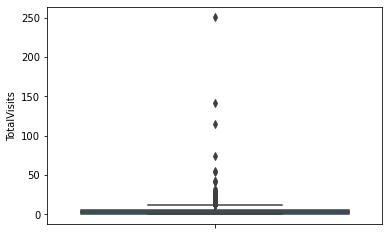

In [66]:
sns.boxplot( y = lead_df["TotalVisits"])
plt.show()

In [67]:
# As the variable "TotalVisits" has heavy outliers, Checking its distribution through percentiles

lead_df["TotalVisits"].describe(percentiles = [0.15, 0.25, 0.35, 0.50, 0.75, 0.90, 0.95, 0.99,0.999])

count    9240.000000
mean        3.394156
std         4.836682
min         0.000000
15%         0.000000
25%         0.000000
35%         2.000000
50%         3.000000
75%         5.000000
90%         7.000000
95%        10.000000
99%        17.000000
99.9%      31.522000
max       251.000000
Name: TotalVisits, dtype: float64

- 99.9% of the values are gradually increasing without any jump, But suddenly there is a <font color = red>jump from 31 to 251</font>
- Mean and Median are almost same
- In general case people visiting the site for 251 times is quite rare.
- So Considering the vlaues only till 99th percentile for the variable "TotalVisits" as an outlier Treatment.

In [68]:
TV_upper_fence = lead_df["TotalVisits"].quantile(0.999)

In [69]:
lead_df = lead_df[lead_df["TotalVisits"] <= TV_upper_fence]

In [70]:
# We have lost 10 rows, but it is a necesary loss to maintain the dataset good for model building

lead_df.shape

(9230, 18)

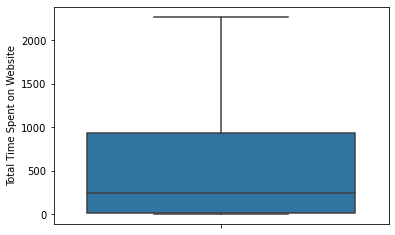

In [71]:
sns.boxplot( y = lead_df["Total Time Spent on Website"])
plt.show()

- Seems the distrubution of the customers who spends more time on the website is higher than the customers who spends less time on the Website.
- No outliers, so lets consider this variable without any change.

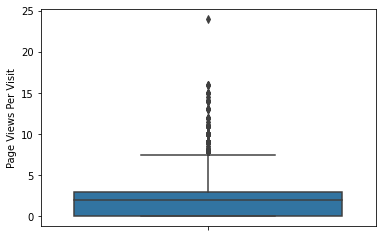

In [72]:
sns.boxplot( y = lead_df["Page Views Per Visit"])
plt.show()

- Values in the variable "Page Views Per Visit" Are continuous even after the upperfence which indicating these values are acceptable outliers.
- But we can observe a single outlier which can be eleminated as it is compressing the whole distribution of the variable 

In [73]:
lead_df["Page Views Per Visit"].describe(percentiles = [0.90, 0.95, 0.99,0.999])

count    9230.000000
mean        2.319596
std         2.090562
min         0.000000
50%         2.000000
90%         5.000000
95%         6.000000
99%         9.000000
99.9%      14.000000
max        24.000000
Name: Page Views Per Visit, dtype: float64

In [74]:
# dropping the value which has more than - 20 Page Views Per Visit

lead_df = lead_df[lead_df["Page Views Per Visit"] <= 20]

In [75]:
# As expected we have lost only a single row.

lead_df.shape

(9229, 18)

# Bivariate Analysis

In [76]:
cat_var = list(lead_df.select_dtypes(exclude = ["integer", "float"]).columns)

In [77]:
for i in cat_var:
    print(lead_df.groupby(i)["Converted"].mean().sort_values(ascending = False), "\n\n")

Lead Origin
Lead Add Form              0.924791
Landing Page Submission    0.362444
API                        0.311347
Lead Import                0.236364
Name: Converted, dtype: float64 


Lead Source
Welingak Website    0.985915
Reference           0.917603
Google              0.404402
others              0.391304
Organic Search      0.377277
Direct Traffic      0.322161
Olark Chat          0.255271
Referral Sites      0.252033
Facebook            0.236364
Name: Converted, dtype: float64 


Do Not Email
No     0.404776
Yes    0.162088
Name: Converted, dtype: float64 


Last Activity
others                       0.774194
Had a Phone Conversation     0.733333
SMS Sent                     0.629373
Email Opened                 0.364774
Unreachable                  0.333333
Email Link Clicked           0.273408
Unsubscribed                 0.262295
Form Submitted on Website    0.241379
Page Visited on Website      0.235759
Converted to Lead            0.126168
Olark Chat Conversation    

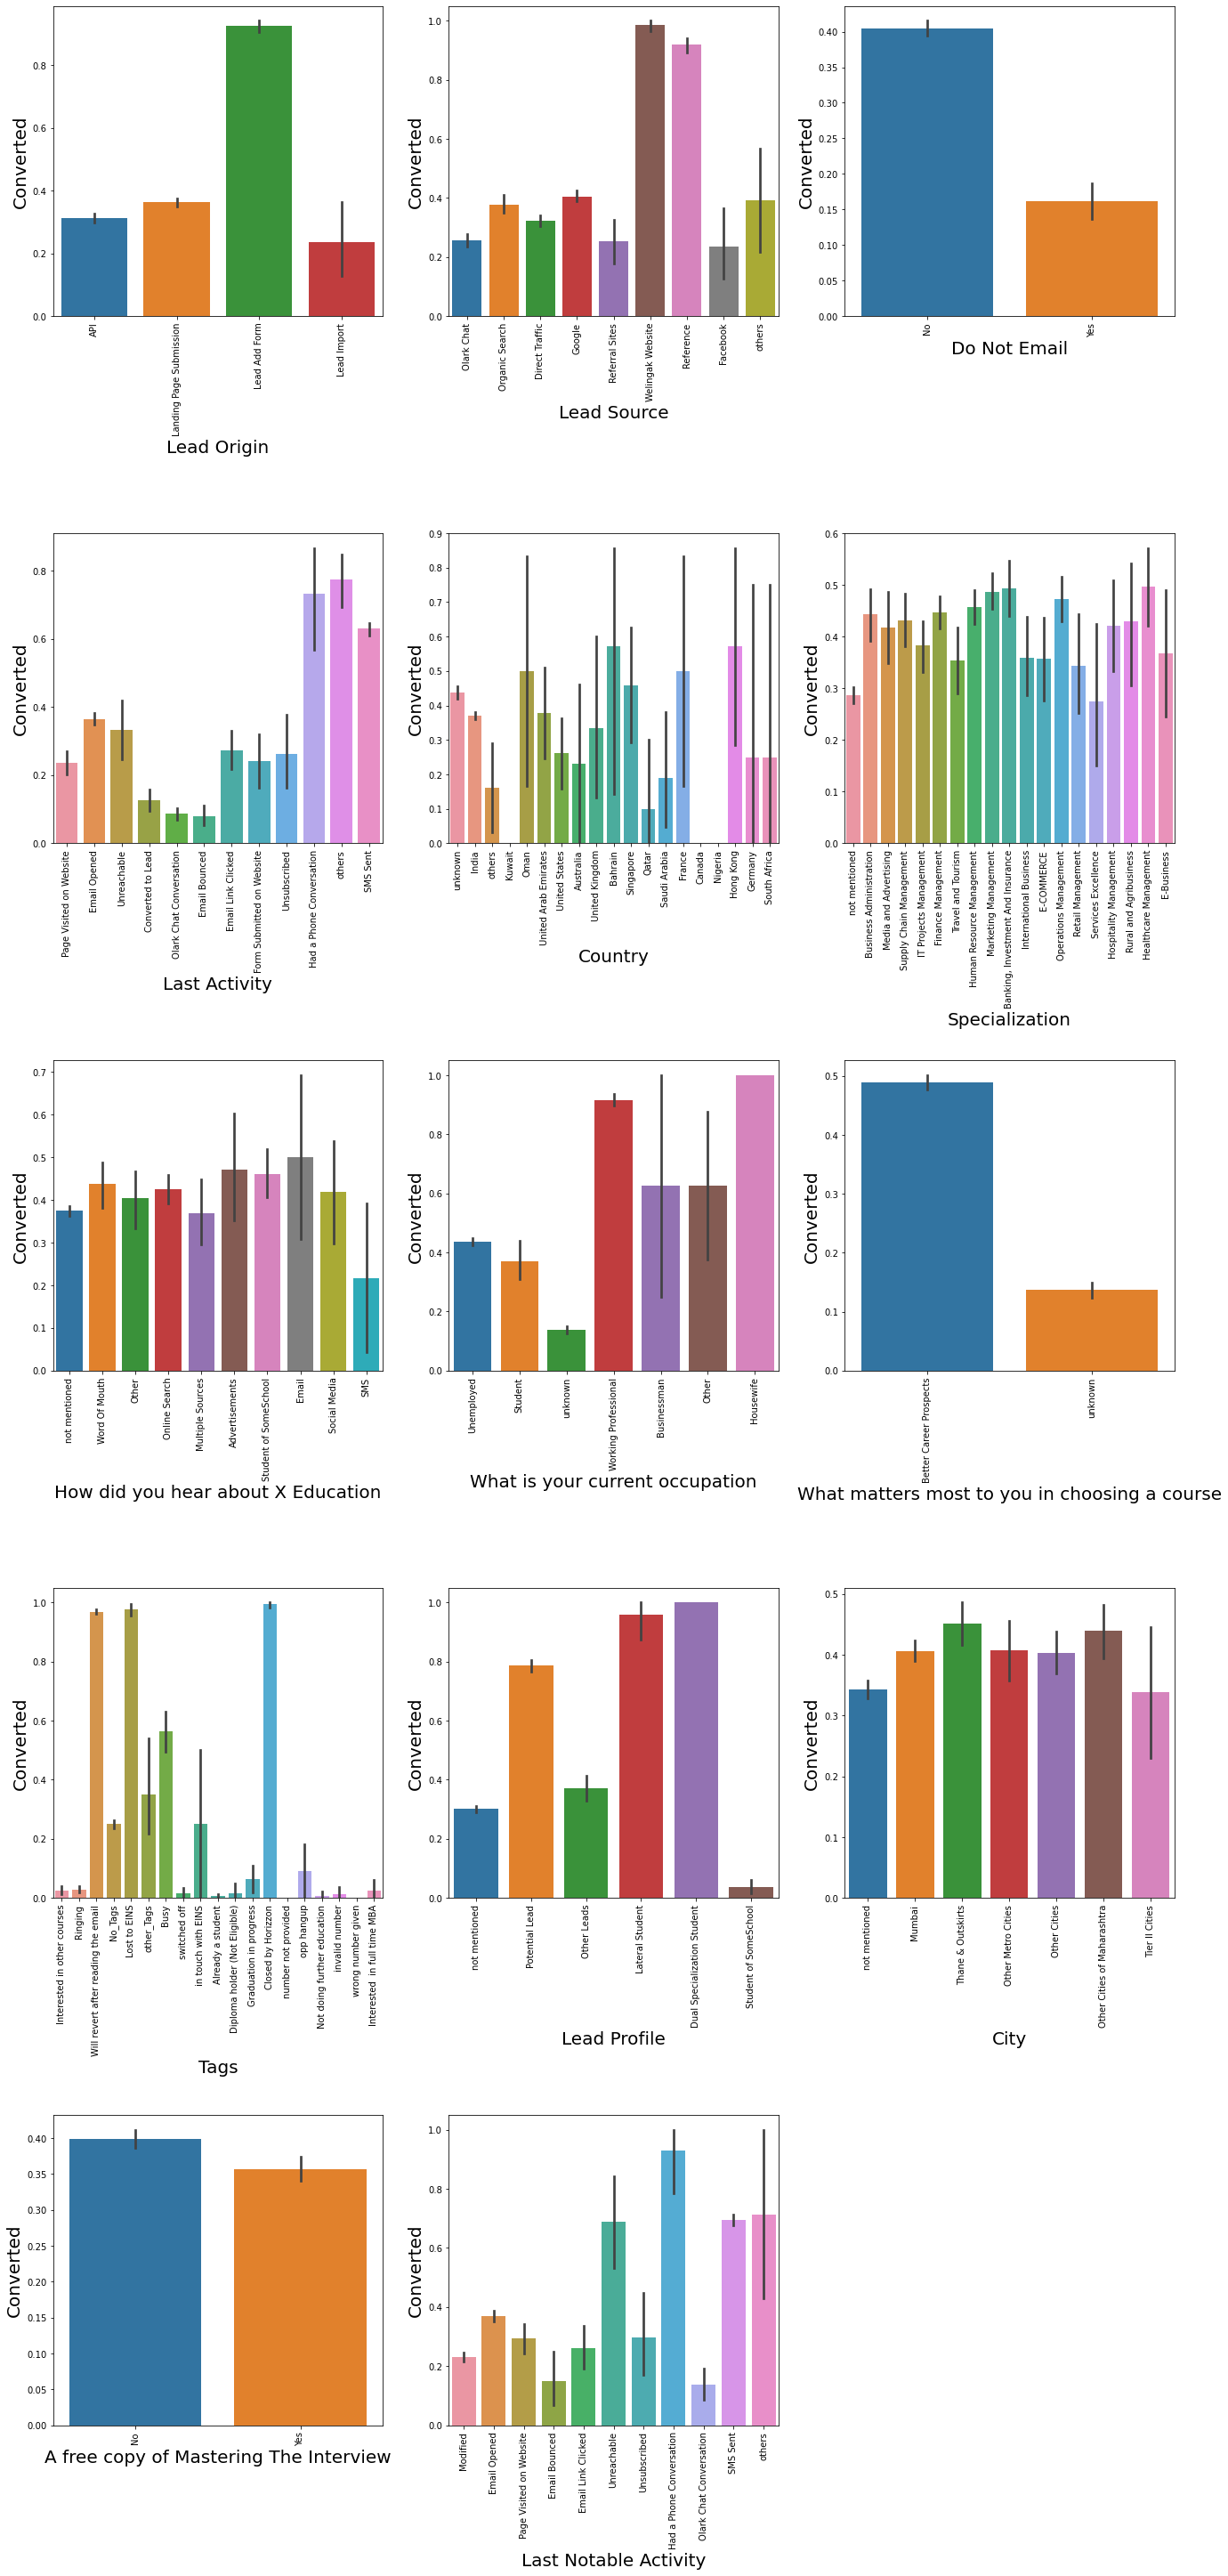

In [78]:
plt.figure(figsize = (35,50))
plt.subplots_adjust(hspace = 0.7, left = 0.4)
for i in enumerate(cat_var):
    plt.subplot(5,3,i[0]+1)
    sns.barplot(x = i[1], y = "Converted", data = lead_df)
    plt.xlabel(i[1], fontdict= {"fontsize" : 20})
    plt.ylabel("Converted", fontdict= {"fontsize" : 20})
    plt.xticks(rotation = 90)

### Inference
- **We have to make a note of the category "Lead Add Form", Because when the customers have Lead Origin as Lead Add Form the chances of the lead converted is approx 92%**<br><br>

- **Suprisingly the leads who have choosed "Do not Email" has higher chances of getting converted than the customers who have given Yes to receive Email.**<br><br>

- **The Leads who sent SMS as their "last activity" has the convertion rate of 63%**<br><br>

- **similar to the leads "last activity", In the Leads "last notable activity" also Leads who sent SMS has a convertion rate of 69%**<br><br>

- **Suprisingly the Customers who didn't want to mention their Country (personal information) have more conversion rate than customers from any other country.**<br><br>

- **Customers who come form 1)Marketing Management, 2)Human Resource Management & 3)Finance Management are moderately likely to get converted. And need not concentrate on customers who are not mentioning their Specialization as they have only 29% of conversion rate.**<br><br>

- **Customers who are as "Working Professionals" have a very significant conversion rate of 92%, And customers who are Unemployed also fairly have a conversion rate of 44%, we can assume that unemployed people to upskill themselves are option for any course from the education company's platform.**<br><br>

- **People who said the reason for taking this course as "To get a Better Career Prospects" have a moderately decent conversion rate.**<br><br>

- **Leads who have been taged as "Will revert after reading the email" have really a high conversion rate of 97%. though the Leads who have been taged as "Closed by Horizzon" & "Lost to EINS" are comparatively less in counts they also show very high conversion rate of 99% and 98%**<br><br>

- **The profile of the leads which have been categorised to a "Potential Lead" shows 78% of conversion rate.**<br><br>

- **Based on the cities we cant judge the leads as it shows an average performance over all the categories.**<br><br>

- **Based on the leads opting for a free copy of Mastering the interview we cant judge the leads as it shows an average performance over both the categories.**<br><br>

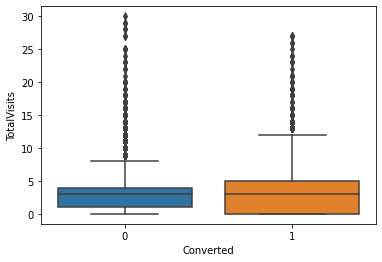

In [79]:
sns.boxplot(x = "Converted", y = "TotalVisits", data = lead_df)
plt.show()

- **The total number of visits of the both types have almost same median and the distribution below the median is comparatively high from the distribution above the median, indicating that, Categorising the leads as converted or not purley based on the total number of visits to the website is trivial.**

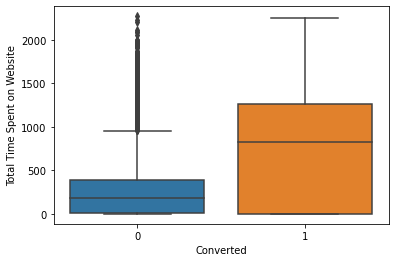

In [80]:
sns.boxplot(x = "Converted", y = "Total Time Spent on Website", data = lead_df)
plt.show()

- **It is certain that if the customer spents significant time on the companies website, the chances of the customer to get converted is high.**

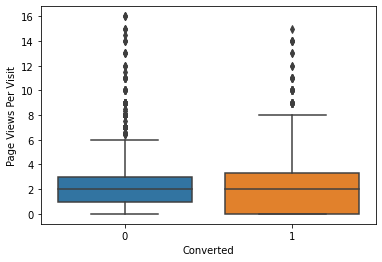

In [81]:
sns.boxplot(x = "Converted", y = "Page Views Per Visit", data = lead_df)
plt.show()

- **Both the categoires share almost a common median, the distribution is also not that evident to take any assumptions only based on the page views per visit of the leads.**

# Creating dummy variables

In [82]:
lead_df.reset_index(drop = True, inplace = True)

In [83]:
cat_var = lead_df.select_dtypes(exclude = ["integer","float"]).columns
cat_var

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Last Activity',
       'Country', 'Specialization', 'How did you hear about X Education',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Tags', 'Lead Profile',
       'City', 'A free copy of Mastering The Interview',
       'Last Notable Activity'],
      dtype='object')

In [84]:
dummy = pd.get_dummies(lead_df[cat_var], drop_first = True)

In [85]:
# Dropping the original variables

lead_df.drop(cat_var, axis = 1, inplace = True)

In [86]:
lead_df = pd.concat([lead_df, dummy], axis = 1)

In [87]:
lead_df.shape

(9229, 119)

In [88]:
lead_df.head()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Lead Source_others,Do Not Email_Yes,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_others,Country_Bahrain,Country_Canada,Country_France,Country_Germany,Country_Hong Kong,Country_India,Country_Kuwait,Country_Nigeria,Country_Oman,Country_Qatar,Country_Saudi Arabia,Country_Singapore,Country_South Africa,Country_United Arab Emirates,Country_United Kingdom,Country_United States,Country_others,Country_unknown,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,...,How did you hear about X Education_Student of SomeSchool,How did you hear about X Education_Word Of Mouth,How did you hear about X Education_not mentioned,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,What is your current occupation_unknown,What matters most to you in choosing a course_unknown,Tags_Busy,Tags_Closed by Horizzon,Tags_Diploma holder (Not Eligible),Tags_Graduation in progress,Tags_Interested in full time MBA,Tags_Interested in other courses,Tags_Lost to EINS,Tags_No_Tags,Tags_Not doing further education,Tags_Ringing,Tags_Will revert after reading the email,Tags_in touch with EINS,Tags_invalid number,Tags_number not provided,Tags_opp hangup,Tags_other_Tags,Tags_switched off,Tags_wrong number given,Lead Profile_Lateral Student,Lead Profile_Other Leads,Lead Profile_Potential Lead,Lead Profile_Student of SomeSchool,Lead Profile_not mentioned,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,City_not mentioned,A free copy of Mastering The Interview_Yes,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Opened,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_others
0,0,0.0,0,0.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0
1,0,5.0,674,2.5,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0
2,1,2.0,1532,2.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,...,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0
3,0,1.0,305,1.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,1,2.0,1428,1.0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0


In [89]:
lead_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9229 entries, 0 to 9228
Columns: 119 entries, Converted to Last Notable Activity_others
dtypes: float64(2), int64(2), uint8(115)
memory usage: 1.3 MB


- All variables are in numeric datatype

#### Spliting into train and test dataframes

In [90]:
train_df, test_df = train_test_split(lead_df, test_size = 0.3, random_state = 100)

In [91]:
print(train_df.shape)
print(test_df.shape)

(6460, 119)
(2769, 119)


#### Scaling the numerical variables

In [92]:
scaler = MinMaxScaler()

In [93]:
num_var = ["TotalVisits", "Total Time Spent on Website", "Page Views Per Visit"]

train_df[num_var] = scaler.fit_transform(train_df[num_var])

# Checking the Scaled variabels
train_df.describe()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Lead Source_others,Do Not Email_Yes,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_others,Country_Bahrain,Country_Canada,Country_France,Country_Germany,Country_Hong Kong,Country_India,Country_Kuwait,Country_Nigeria,Country_Oman,Country_Qatar,Country_Saudi Arabia,Country_Singapore,Country_South Africa,Country_United Arab Emirates,Country_United Kingdom,Country_United States,Country_others,Country_unknown,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,...,How did you hear about X Education_Student of SomeSchool,How did you hear about X Education_Word Of Mouth,How did you hear about X Education_not mentioned,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,What is your current occupation_unknown,What matters most to you in choosing a course_unknown,Tags_Busy,Tags_Closed by Horizzon,Tags_Diploma holder (Not Eligible),Tags_Graduation in progress,Tags_Interested in full time MBA,Tags_Interested in other courses,Tags_Lost to EINS,Tags_No_Tags,Tags_Not doing further education,Tags_Ringing,Tags_Will revert after reading the email,Tags_in touch with EINS,Tags_invalid number,Tags_number not provided,Tags_opp hangup,Tags_other_Tags,Tags_switched off,Tags_wrong number given,Lead Profile_Lateral Student,Lead Profile_Other Leads,Lead Profile_Potential Lead,Lead Profile_Student of SomeSchool,Lead Profile_not mentioned,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,City_not mentioned,A free copy of Mastering The Interview_Yes,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Opened,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_others
count,6460.000000,6460.000000,6460.000000,6460.000000,6460.000000,6460.000000,6460.000000,6460.000000,6460.000000,6460.000000,6460.000000,6460.000000,6460.000000,6460.000000,6460.000000,6460.000000,6460.000000,6460.000000,6460.000000,6460.000000,6460.000000,6460.000000,6460.000000,6460.000000,6460.000000,6460.000000,6460.000000,6460.000000,6460.000000,6460.000000,6460.000000,6460.000000,6460.000000,6460.000000,6460.000000,6460.000000,6460.000000,6460.000000,6460.000000,6460.000000,6460.000000,6460.000000,6460.000000,6460.000000,6460.000000,6460.000000,6460.000000,6460.000000,6460.000000,6460.000000,...,6460.000000,6460.000000,6460.000000,6460.000000,6460.000000,6460.000000,6460.000000,6460.000000,6460.000000,6460.000000,6460.000000,6460.000000,6460.000000,6460.000000,6460.000000,6460.000000,6460.000000,6460.000000,6460.000000,6460.000000,6460.000000,6460.000000,6460.000000,6460.000000,6460.000000,6460.000000,6460.000000,6460.000000,6460.000000,6460.000000,6460.000000,6460.000000,6460.000000,6460.000000,6460.000000,6460.000000,6460.000000,6460.000000,6460.000000,6460.000000,6460.000000,6460.000000,6460.000000,6460.000000,6460.000000,6460.000000,6460.000000,6460.000000,6460.000000,6460.000000
mean,0.387307,0.1

-  The **min and max** values shows that all the numerical variables have been **perfectly scaled between 0 and 1.**

# Model Building

In [94]:
X_train = train_df.drop("Converted", axis = 1)
y_train = train_df["Converted"]

In [95]:
logreg = LogisticRegression()

### Selecting top 17 features using RFE (Coarse Tuning)

In [96]:
rfe = RFE(logreg, 17)

In [97]:
rfe = rfe.fit(X_train, y_train)

In [98]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('TotalVisits', False, 10),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 9),
 ('Lead Origin_Landing Page Submission', False, 68),
 ('Lead Origin_Lead Add Form', False, 40),
 ('Lead Origin_Lead Import', False, 61),
 ('Lead Source_Facebook', False, 8),
 ('Lead Source_Google', False, 60),
 ('Lead Source_Olark Chat', False, 94),
 ('Lead Source_Organic Search', False, 59),
 ('Lead Source_Reference', False, 41),
 ('Lead Source_Referral Sites', False, 57),
 ('Lead Source_Welingak Website', True, 1),
 ('Lead Source_others', False, 58),
 ('Do Not Email_Yes', False, 16),
 ('Last Activity_Email Bounced', False, 62),
 ('Last Activity_Email Link Clicked', False, 33),
 ('Last Activity_Email Opened', False, 46),
 ('Last Activity_Form Submitted on Website', False, 75),
 ('Last Activity_Had a Phone Conversation', False, 88),
 ('Last Activity_Olark Chat Conversation', False, 24),
 ('Last Activity_Page Visited on Website', False, 80),
 ('Last Activity_SMS Sent', True, 1),


In [99]:
col_list = list(X_train.columns[rfe.support_])
col_list

['Total Time Spent on Website',
 'Lead Source_Welingak Website',
 'Last Activity_SMS Sent',
 'What matters most to you in choosing a course_unknown',
 'Tags_Busy',
 'Tags_Closed by Horizzon',
 'Tags_Lost to EINS',
 'Tags_No_Tags',
 'Tags_Ringing',
 'Tags_Will revert after reading the email',
 'Tags_in touch with EINS',
 'Tags_invalid number',
 'Tags_other_Tags',
 'Tags_switched off',
 'Lead Profile_Student of SomeSchool',
 'Last Notable Activity_Modified',
 'Last Notable Activity_Olark Chat Conversation']

### Selecting the optimum features for model building using Manual Elimination (Fine Tuning)

In [100]:
X_train_sm = sm.add_constant(X_train[col_list])

In [101]:
logreg1 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial()).fit()
logreg1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6460
Model:                            GLM   Df Residuals:                     6442
Model Family:                Binomial   Df Model:                           17
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1105.2
Date:                Tue, 26 Oct 2021   Deviance:                       2210.5
Time:                        12:24:35   Pearson chi2:                 8.22e+03
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
=========================================================================================================================
                                                            coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------------------
const                                                    -4.3982      0.252    -17.451      0.000      -4.892      -3.904
Total Time Spent on Website                               3.8865      0.238     16.316      0.000       3.420       4.353
Lead Source_Welingak Website                              3.0071      0.742      4.051      0.000       1.552       4.462
Last Activity_SMS Sent                                    1.9782      0.127     15.531      0.000       1.729       2.228
What matters most to you in choosing a course_unknown    -2.9694      0.161    -18.435      0.000      -3.285      -2.654
Tags_Busy                                                 2.5302      0.317      7.989      0.000       1.909       3.151
Tags_Closed by Horizzon                                  10.3581      1.039      9.972      0.000       8.322      12.394
Tags_Lost to EINS                                        11.1129      1.073     10.357      0.000       9.010      13.216
Tags_No_Tags                                              4.4192      0.270     16.377      0.000       3.890       4.948
Tags_Ringing                                             -1.1518      0.323     -3.568      0.000      -1.784      -0.519
Tags_Will revert after reading the email                  6.8141      0.286     23.795      0.000       6.253       7.375
Tags_in touch with EINS                                   3.7473      0.944      3.970      0.000       1.897       5.597
Tags_invalid number                                      -1.8293      1.141     -1.603      0.109      -4.066       0.407
Tags_other_Tags                                           2.7745      0.540      5.138      0.000       1.716       3.833
Tags_switched off                                        -1.6933      0.646     -2.623      0.009      -2.959      -0.428
Lead Profile_Student of SomeSchool                       -2.5130      1.136     -2.212      0.027      -4.739      -0.287
Last Notable Activity_Modified                           -1.6332      0.132    -12.351      0.000      -1.892      -1.374
Last Notable Activity_Olark Chat Conversation            -1.7261      0.496     -3.479      0.001      -2.698      -0.754
=========================================================================================================================
"""

- **Before dropping insignificant variables, checking multicolinearity for dropping the most reduntant variable**

### Checking the multicolinearity using VIF

In [102]:
# creating a function to check the Variance Inflation Factor

def vif_value(X):
    vif = pd.DataFrame()
    vif["Features"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif["VIF"] = round(vif["VIF"],2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return vif

In [103]:
vif_value(X_train_sm)

,Features,VIF
0,const,10.03
8,Tags_No_Tags,4.83
4,What matters most to you in choosing a course_...,3.39
10,Tags_Will revert after reading the email,2.44
9,Tags_Ringing,1.81
6,Tags_Closed by Horizzon,1.24
16,Last Notable Activity_Modified,1.21
14,Tags_switched off,1.18
5,Tags_Busy,1.17
3,Last Activity_SMS Sent,1.17


- **Seems the variables in the model are not correlated with each other, So Dropping the variable "Tags_invalid number" as it is insignificant variable having a p-value 0.109**

In [104]:
col_list.remove("Tags_invalid number")

In [105]:
X_train_sm = sm.add_constant(X_train[col_list])

logreg2 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial()).fit()
logreg2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6460
Model:                            GLM   Df Residuals:                     6443
Model Family:                Binomial   Df Model:                           16
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1107.1
Date:                Tue, 26 Oct 2021   Deviance:                       2214.3
Time:                        12:24:35   Pearson chi2:                 8.15e+03
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
=========================================================================================================================
                                                            coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------------------
const                                                    -4.5340      0.250    -18.162      0.000      -5.023      -4.045
Total Time Spent on Website                               3.8836      0.238     16.302      0.000       3.417       4.350
Lead Source_Welingak Website                              3.0068      0.742      4.053      0.000       1.553       4.461
Last Activity_SMS Sent                                    1.9593      0.127     15.470      0.000       1.711       2.207
What matters most to you in choosing a course_unknown    -2.9640      0.161    -18.442      0.000      -3.279      -2.649
Tags_Busy                                                 2.6763      0.313      8.546      0.000       2.063       3.290
Tags_Closed by Horizzon                                  10.4824      1.039     10.093      0.000       8.447      12.518
Tags_Lost to EINS                                        11.2344      1.073     10.472      0.000       9.132      13.337
Tags_No_Tags                                              4.5555      0.268     17.026      0.000       4.031       5.080
Tags_Ringing                                             -1.0004      0.319     -3.140      0.002      -1.625      -0.376
Tags_Will revert after reading the email                  6.9472      0.285     24.398      0.000       6.389       7.505
Tags_in touch with EINS                                   3.8811      0.942      4.118      0.000       2.034       5.728
Tags_other_Tags                                           2.9151      0.538      5.419      0.000       1.861       3.969
Tags_switched off                                        -1.5413      0.643     -2.396      0.017      -2.802      -0.280
Lead Profile_Student of SomeSchool                       -2.4725      1.150     -2.150      0.032      -4.727      -0.218
Last Notable Activity_Modified                           -1.6212      0.132    -12.269      0.000      -1.880      -1.362
Last Notable Activity_Olark Chat Conversation            -1.7248      0.496     -3.478      0.001      -2.697      -0.753
=========================================================================================================================
"""

In [106]:
vif_value(X_train_sm)

,Features,VIF
0,const,9.50
8,Tags_No_Tags,4.71
4,What matters most to you in choosing a course_...,3.39
10,Tags_Will revert after reading the email,2.34
9,Tags_Ringing,1.75
6,Tags_Closed by Horizzon,1.23
15,Last Notable Activity_Modified,1.21
3,Last Activity_SMS Sent,1.17
13,Tags_switched off,1.17
5,Tags_Busy,1.16


- **Though all the variables are significant and exhibits no collinearity, we are dropping the variable "Lead Profile_Student of SomeSchool" as it has comparatively high P-value than other variables**

In [107]:
col_list.remove("Lead Profile_Student of SomeSchool")

In [108]:
X_train_sm = sm.add_constant(X_train[col_list])

logreg3 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial()).fit()
logreg3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6460
Model:                            GLM   Df Residuals:                     6444
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1110.3
Date:                Tue, 26 Oct 2021   Deviance:                       2220.6
Time:                        12:24:36   Pearson chi2:                 8.23e+03
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
=========================================================================================================================
                                                            coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------------------
const                                                    -4.6549      0.247    -18.832      0.000      -5.139      -4.170
Total Time Spent on Website                               3.8813      0.238     16.317      0.000       3.415       4.348
Lead Source_Welingak Website                              3.0060      0.742      4.051      0.000       1.552       4.460
Last Activity_SMS Sent                                    1.9742      0.127     15.569      0.000       1.726       2.223
What matters most to you in choosing a course_unknown    -2.9675      0.161    -18.444      0.000      -3.283      -2.652
Tags_Busy                                                 2.7883      0.312      8.934      0.000       2.177       3.400
Tags_Closed by Horizzon                                  10.5539      1.038     10.171      0.000       8.520      12.588
Tags_Lost to EINS                                        11.3423      1.074     10.565      0.000       9.238      13.446
Tags_No_Tags                                              4.6736      0.266     17.597      0.000       4.153       5.194
Tags_Ringing                                             -0.8906      0.318     -2.804      0.005      -1.513      -0.268
Tags_Will revert after reading the email                  7.0422      0.283     24.904      0.000       6.488       7.596
Tags_in touch with EINS                                   3.9982      0.942      4.243      0.000       2.152       5.845
Tags_other_Tags                                           3.0282      0.538      5.632      0.000       1.974       4.082
Tags_switched off                                        -1.4321      0.643     -2.228      0.026      -2.692      -0.172
Last Notable Activity_Modified                           -1.6198      0.132    -12.260      0.000      -1.879      -1.361
Last Notable Activity_Olark Chat Conversation            -1.7226      0.494     -3.489      0.000      -2.690      -0.755
=========================================================================================================================
"""

In [109]:
vif_value(X_train_sm)

,Features,VIF
0,const,8.41
8,Tags_No_Tags,4.50
4,What matters most to you in choosing a course_...,3.39
10,Tags_Will revert after reading the email,2.18
9,Tags_Ringing,1.64
14,Last Notable Activity_Modified,1.21
6,Tags_Closed by Horizzon,1.20
3,Last Activity_SMS Sent,1.17
13,Tags_switched off,1.15
5,Tags_Busy,1.14


- **Though all the variables are significant and exhibits no collinearity, we are dropping the variable "Tags_switched off" as it has comparatively high p-value than other variables**

In [110]:
col_list.remove("Tags_switched off")

In [111]:
X_train_sm = sm.add_constant(X_train[col_list])

logreg4 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial()).fit()
logreg4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6460
Model:                            GLM   Df Residuals:                     6445
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1113.6
Date:                Tue, 26 Oct 2021   Deviance:                       2227.2
Time:                        12:24:37   Pearson chi2:                 7.83e+03
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
=========================================================================================================================
                                                            coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------------------
const                                                    -4.9411      0.237    -20.854      0.000      -5.406      -4.477
Total Time Spent on Website                               3.8903      0.238     16.372      0.000       3.425       4.356
Lead Source_Welingak Website                              3.0076      0.741      4.056      0.000       1.554       4.461
Last Activity_SMS Sent                                    1.9359      0.125     15.438      0.000       1.690       2.182
What matters most to you in choosing a course_unknown    -2.9586      0.160    -18.457      0.000      -3.273      -2.644
Tags_Busy                                                 3.0924      0.300     10.318      0.000       2.505       3.680
Tags_Closed by Horizzon                                  10.8239      1.036     10.447      0.000       8.793      12.855
Tags_Lost to EINS                                        11.6045      1.072     10.823      0.000       9.503      13.706
Tags_No_Tags                                              4.9603      0.256     19.400      0.000       4.459       5.461
Tags_Ringing                                             -0.5783      0.304     -1.904      0.057      -1.174       0.017
Tags_Will revert after reading the email                  7.3242      0.274     26.685      0.000       6.786       7.862
Tags_in touch with EINS                                   4.2808      0.938      4.564      0.000       2.442       6.119
Tags_other_Tags                                           3.3231      0.531      6.260      0.000       2.283       4.364
Last Notable Activity_Modified                           -1.6009      0.132    -12.114      0.000      -1.860      -1.342
Last Notable Activity_Olark Chat Conversation            -1.7216      0.494     -3.482      0.000      -2.691      -0.753
=========================================================================================================================
"""

In [112]:
vif_value(X_train_sm)

,Features,VIF
0,const,7.44
8,Tags_No_Tags,4.28
4,What matters most to you in choosing a course_...,3.39
10,Tags_Will revert after reading the email,1.99
9,Tags_Ringing,1.53
13,Last Notable Activity_Modified,1.19
6,Tags_Closed by Horizzon,1.17
3,Last Activity_SMS Sent,1.16
1,Total Time Spent on Website,1.13
2,Lead Source_Welingak Website,1.12


- **Seems the variables in the model are not correlated with each other, So Dropping the variable"Tags_Ringing" as it is insignificant variable having a p-value 0.057**

In [113]:
col_list.remove("Tags_Ringing")

In [114]:
X_train_sm = sm.add_constant(X_train[col_list])

logreg5 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial()).fit()
logreg5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6460
Model:                            GLM   Df Residuals:                     6446
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1115.4
Date:                Tue, 26 Oct 2021   Deviance:                       2230.8
Time:                        12:24:37   Pearson chi2:                 7.47e+03
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
=========================================================================================================================
                                                            coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------------------
const                                                    -5.2369      0.195    -26.894      0.000      -5.619      -4.855
Total Time Spent on Website                               3.8820      0.237     16.363      0.000       3.417       4.347
Lead Source_Welingak Website                              3.0073      0.741      4.058      0.000       1.555       4.460
Last Activity_SMS Sent                                    1.9087      0.124     15.336      0.000       1.665       2.153
What matters most to you in choosing a course_unknown    -2.9503      0.160    -18.471      0.000      -3.263      -2.637
Tags_Busy                                                 3.4045      0.261     13.038      0.000       2.893       3.916
Tags_Closed by Horizzon                                  11.1078      1.028     10.802      0.000       9.092      13.123
Tags_Lost to EINS                                        11.8824      1.065     11.160      0.000       9.795      13.969
Tags_No_Tags                                              5.2581      0.216     24.343      0.000       4.835       5.681
Tags_Will revert after reading the email                  7.6186      0.239     31.852      0.000       7.150       8.087
Tags_in touch with EINS                                   4.5755      0.927      4.936      0.000       2.759       6.392
Tags_other_Tags                                           3.6278      0.511      7.104      0.000       2.627       4.629
Last Notable Activity_Modified                           -1.5855      0.132    -12.001      0.000      -1.844      -1.327
Last Notable Activity_Olark Chat Conversation            -1.7181      0.494     -3.474      0.001      -2.687      -0.749
=========================================================================================================================
"""

In [115]:
vif_value(X_train_sm)

,Features,VIF
0,const,4.92
8,Tags_No_Tags,3.74
4,What matters most to you in choosing a course_...,3.39
9,Tags_Will revert after reading the email,1.51
12,Last Notable Activity_Modified,1.15
3,Last Activity_SMS Sent,1.14
1,Total Time Spent on Website,1.13
2,Lead Source_Welingak Website,1.12
6,Tags_Closed by Horizzon,1.11
7,Tags_Lost to EINS,1.08


**Seems the all the variables are significant and exhibits non-collinearity, this model can be fixed as the final model for predictions.**

##### Using the model to predict the probability of a lead getting converted in the train dataset

In [116]:
y_train_prob = logreg5.predict(X_train_sm)

In [117]:
result = pd.DataFrame({"Converted" : y_train,
                          "Probability" : y_train_prob})

In [118]:
result["Predicted"] = result["Probability"].map(lambda x : 1 if x > 0.5 else 0)

In [119]:
result.head()

,Converted,Probability,Predicted
3330,0,0.016310,0
712,0,0.001408,0
3934,1,0.992158,1
6626,0,0.066582,0
2988,0,0.084921,0


In [120]:
# checking the accuracy of the model

metrics.accuracy_score(result["Converted"], result["Predicted"])

0.9351393188854489

In [121]:
# Confusion matrix

cm1 = metrics.confusion_matrix(result["Converted"], result["Predicted"])
cm1

array([[3763,  195],
       [ 224, 2278]], dtype=int64)

array([[3767,  191],
       [ 229, 2273]], dtype=int64)

In [122]:
TN = cm1[0,0]
FP = cm1[0,1]
TP = cm1[1,1]
FN = cm1[1,0]

In [123]:
# Checking Sensitivity

sensitivity = TP/(TP+FN)
sensitivity

0.9104716227018386

0.9084732214228617

In [124]:
# Checking Specificity

specificity = TN/(TN+FP)
specificity

0.9507326932794341

0.9517433046993431

In [125]:
# Checking Precision

precision = TP/(TP+FP)
precision

0.9211484027496967

0.9224837662337663

In [126]:
# Checking recall

recall = TP/(TP+FN)
recall

0.9104716227018386

0.9084732214228617

### Plotting ROC curve

In [127]:
def roc_curve(actual, prob):
    fpr, tpr, thresholds = metrics.roc_curve(actual, prob, drop_intermediate = False)
    auc_area = metrics.roc_auc_score(actual, prob)
    plt.figure(figsize = [8,5])
    plt.plot(fpr, tpr, label = "Area Under the Curve = %0.2f" %auc_area)
    plt.plot([0,1],[0,1], "k--")
    plt.xlabel("False Positive Rate\n", fontdict = {"fontsize" : 15, "fontweight" : 5})
    plt.ylabel("True Positive Rate\n", fontdict = {"fontsize" : 15, "fontweight" : 5})
    plt.title("ROC curve \n", fontdict = {"fontsize" : 20, "fontweight" : 5})
    plt.legend(loc = "lower right")
    plt.show()

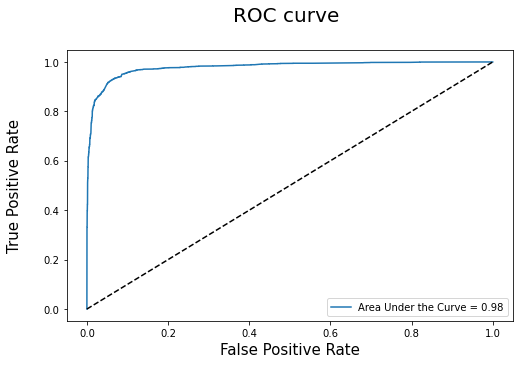

In [128]:
roc_curve(result["Converted"], result["Probability"])

- **If the tradeoff between False Positive Rate and the True Positive Rate is maintained, we can observe a Receiver Operating Characteristic(ROC) curve which tends towards the top left corner of the grid.**<br><br>

- **The total area of the grid is 1, So the Area Under the Curve close to 1 indicates that the model is maintaining a good  tradeoff between the FPR and TPR.**

### Predicting the optimum threshold value to classify a given data point

In [129]:
num = [x/10 for x in range(10)]
num

[0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]

In [130]:
for i in num:
    result[i] = result["Probability"].map(lambda x : 1 if x > i else 0)

In [131]:
result.head()

,Converted,Probability,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
3330,0,0.016310,0,1,0,0,0,0,0,0,0,0,0
712,0,0.001408,0,1,0,0,0,0,0,0,0,0,0
3934,1,0.992158,1,1,1,1,1,1,1,1,1,1,1
6626,0,0.066582,0,1,0,0,0,0,0,0,0,0,0
2988,0,0.084921,0,1,0,0,0,0,0,0,0,0,0


In [132]:
# Visualizing the evaluation metrics of the classification model, 
# To select an optimum threshold value which maintains the tradeoff between these metrics. 

cutoff = pd.DataFrame(columns = ["Cutoff", "accuracy", "sensitivity", "specificity"])

for i in num:
    cm = metrics.confusion_matrix(result["Converted"], result[i])
    
    accuracy = metrics.accuracy_score(result["Converted"], result[i])
    
    sensitivity = cm[1,1]/(cm[1,1] + cm[1,0])
    
    specificity = cm[0,0]/(cm[0,0] + cm[0,1])
    
    cutoff.loc[i] = [i, accuracy, sensitivity, specificity]
    
cutoff

,Cutoff,accuracy,sensitivity,specificity
0.0,0.0,0.387307,1.000000,0.000000
0.1,0.1,0.892260,0.971223,0.842345
0.2,0.2,0.921517,0.958433,0.898181
0.3,0.3,0.929876,0.936051,0.925973
0.4,0.4,0.934985,0.922062,0.943153
0.5,0.5,0.935139,0.910472,0.950733
0.6,0.6,0.928793,0.870104,0.965892
0.7,0.7,0.927709,0.848122,0.978019
0.8,0.8,0.920898,0.821343,0.983830
0.9,0.9,0.901238,0.763789,0.988125


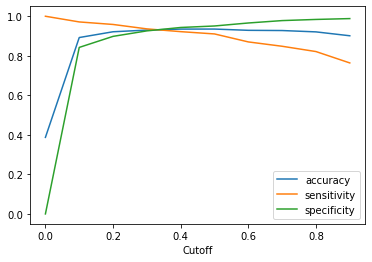

In [133]:
cutoff.plot.line(x = "Cutoff", y = ["accuracy", "sensitivity", "specificity"])
plt.show()

- **It is evident that the cutoff value of 0.3 maintains the tradeoff between these metrics perfectly**
- **So finalizing the threshold value as 0.3**

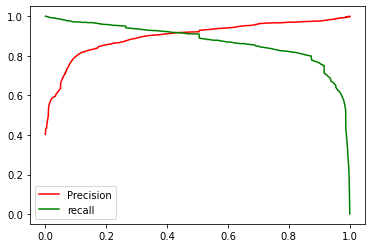

In [134]:
# Based on the business problem we may also want to check the tradeoff between the precision and recall

p, r, thresholds = metrics.precision_recall_curve(result["Converted"], result["Probability"])

plt.plot(thresholds, p[:-1], "r-", label = "Precision")
plt.plot(thresholds, r[:-1], "g-", label = "recall")
plt.legend()
plt.show()

- **Based on the Business problem we can either choose the "Sensitivity and Specificity tradeoff" or "precision and recall tradeoff"**<br><br>
-  **As our problem statement is to increase the lead converation rate we want our model to predict the 1's (Lead getting converted to paying customer) so we are choosing optimum cutoff value based on the sensitivity and specificity tradeoff.**

In [135]:
train_result = pd.DataFrame()
train_result["Converted"] = result["Converted"]
train_result["Probability"] = result["Probability"]
train_result["Predicted"] = train_result["Probability"].map(lambda x : 1 if x > 0.3 else 0)

In [136]:
train_result.head()

,Converted,Probability,Predicted
3330,0,0.016310,0
712,0,0.001408,0
3934,1,0.992158,1
6626,0,0.066582,0
2988,0,0.084921,0


In [137]:
# Checking the Accuracy of the model

metrics.accuracy_score(train_result["Converted"], train_result["Predicted"])

0.929876160990712

In [138]:
# confusion matrix

conf_mat = metrics.confusion_matrix(train_result["Converted"], train_result["Predicted"])
conf_mat

array([[3665,  293],
       [ 160, 2342]], dtype=int64)

In [139]:
TN = conf_mat[0,0]
FP = conf_mat[0,1]
TP = conf_mat[1,1]
FN = conf_mat[1,0]

In [140]:
# Sensitivity
sensitivity = TP/(TP+FN)
sensitivity

0.9360511590727418

In [141]:
# specificity

specificity = TN/(TN+FP)
specificity

0.9259727134916624

In [142]:
# precision

precision = TP/(TP+FP)
precision

0.8888045540796964

In [143]:
# Checking recall

recall = TP/(TP+FN)
recall

0.9360511590727418

# Predictions on the test set

In [144]:
X_test = test_df.drop("Converted", axis = 1)
y_test = test_df["Converted"]

In [145]:
# Scaling numerical variables of the test dataset

X_test[num_var] = scaler.transform(X_test[num_var])

In [146]:
X_test = X_test[col_list]

In [147]:
# Crossing checking the test dataset, Only the variables present in the final model should aslo be present in the test dataset 

X_test.head()

,Total Time Spent on Website,Lead Source_Welingak Website,Last Activity_SMS Sent,What matters most to you in choosing a course_unknown,Tags_Busy,Tags_Closed by Horizzon,Tags_Lost to EINS,Tags_No_Tags,Tags_Will revert after reading the email,Tags_in touch with EINS,Tags_other_Tags,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation
7484,0.069982,0,1,0,0,0,0,0,0,0,0,0,0
496,0.058539,0,0,1,0,0,0,1,0,0,0,1,0
5823,0.000000,0,0,1,0,0,0,1,0,0,0,1,0
7276,0.010123,0,0,0,0,0,0,0,0,0,0,1,0
5307,0.000000,0,0,0,0,0,0,1,0,0,0,0,0


In [148]:
X_test_sm = sm.add_constant(X_test)

In [149]:
# prediciting the probability of a lead getting converted in test dataset (unseen data)

y_test_prob = logreg5.predict(X_test_sm)

In [150]:
y_test_prob.head()

7484    0.044935
496     0.013554
5823    0.010828
7276    0.001131
5307    0.505285
dtype: float64

In [151]:
# Creating a DataFrame which has the Actual, probability and the predicted values

test_result = pd.DataFrame(y_test)

y_test_prob = pd.DataFrame(y_test_prob)

test_result = pd.concat([test_result, y_test_prob], axis = 1)

In [152]:
test_result.rename(columns = {0 : "Convert_prob"}, inplace = True)
test_result.reset_index(drop = True, inplace = True)

- **Creating Lead Score between 0 and 100 which is demanded by the business, which can be used by the company to target potential leads**<br><br>
-  **A higher score would mean that the lead is hot, i.e. is most likely to convert whereas a lower score would mean that the lead is cold and will mostly not get converted**

In [153]:
test_result["Lead Score"] = round((test_result["Convert_prob"])*100, 2)

In [154]:
test_result["Predicted"] = test_result["Convert_prob"].map(lambda x : 1 if x > 0.3 else 0)

In [155]:
test_result.head()

,Converted,Convert_prob,Lead Score,Predicted
0,0,0.044935,4.49,0
1,0,0.013554,1.36,0
2,0,0.010828,1.08,0
3,0,0.001131,0.11,0
4,0,0.505285,50.53,1


## Model Evaluation

In [156]:
# Checking the accuracy of the model in the test dataset

metrics.accuracy_score(test_result["Converted"], test_result["Predicted"])

0.9230769230769231

**Confusion Matrix**

In [157]:
test_conf_mat = metrics.confusion_matrix(test_result["Converted"], test_result["Predicted"])
test_conf_mat

array([[1567,  145],
       [  68,  989]], dtype=int64)

In [158]:
TN = test_conf_mat[0,0]
FP = test_conf_mat[0,1]
TP = test_conf_mat[1,1]
FN = test_conf_mat[1,0]

**Sensitivity**

In [159]:
sensitivity = TP/(TP+FN)
sensitivity

0.935666982024598

**Specificity**

In [160]:
specificity = TN/(TN+FP)
specificity

0.915303738317757

**Precision**

In [161]:
precision = TP/(TP+FP)
precision

0.8721340388007055

**Recall**

In [162]:
recall = TP/(TP + FN)
recall

0.935666982024598

**Evaluation metrics on training dataset**

- accuracy    = 92.99%
- Sensitivity = 93.61%
- Specificity = 92.60%
- precision   = 88.89%
- recall      = 93.61%

**Evaluation metrics on test dataset**

- accuracy    = 92.31%
- Sensitivity = 93.57%
- Specificity = 91.53%
- precision   = 87.21%
- recall      = 93.57%

**The coefficients are the log odds of the variables respectively, So the top 3 important variables of the model are**<br>
- When the customer tagged as "Lost to EINS" increases by 1 unit, the customer gets converted **increases** by 11.88 units.<br>
- When the customer tagged as "Closed by Horizzon" increases by 1 unit, the customer gets converted **increases** by 11.11 units.<br>
- while the customer who chooses the answer "unknown" for the question What matters most to you in choosing a course? increases by 1 unit, the customer gets converted **Decrease**s by 2.95 units.